In [38]:
import pandas as pd

In [ ]:
weather = pd.read_csv('data/4180612.csv')

In [119]:
weather.head()

,STATION,NAME,DATE,AWND,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,...,WDF2,WDF5,WSF2,WSF5,WT01,WT02,WT03,WT04,WT06,WT08
0,USW00094728,"NY CITY CENTRAL PARK, NY US",2023-01-01,4.92,NaN,0.00,0.0,0.0,NaN,55,...,310.0,250.0,13.0,18.1,1.0,NaN,NaN,NaN,NaN,NaN
1,USW00094728,"NY CITY CENTRAL PARK, NY US",2023-01-02,3.58,NaN,0.02,0.0,0.0,NaN,56,...,230.0,240.0,10.1,16.1,NaN,NaN,NaN,NaN,NaN,NaN
2,USW00094728,"NY CITY CENTRAL PARK, NY US",2023-01-03,3.13,NaN,0.42,0.0,0.0,NaN,58,...,250.0,250.0,8.9,15.0,1.0,NaN,NaN,NaN,NaN,1.0
3,USW00094728,"NY CITY CENTRAL PARK, NY US",2023-01-04,4.47,NaN,0.02,0.0,0.0,NaN,66,...,240.0,240.0,13.0,21.9,1.0,NaN,NaN,NaN,NaN,NaN
4,USW00094728,"NY CITY CENTRAL PARK, NY US",2023-01-05,5.14,NaN,0.01,0.0,0.0,NaN,50,...,60.0,50.0,13.0,15.0,1.0,NaN,NaN,NaN,NaN,1.0


In [120]:
weather.isna().sum()

STATION      0
NAME         0
DATE         0
AWND         1
PGTM       365
PRCP         0
SNOW         0
SNWD         0
TAVG       365
TMAX         0
TMIN         0
WDF2         1
WDF5         1
WSF2         1
WSF5         1
WT01       222
WT02       356
WT03       331
WT04       364
WT06       365
WT08       297
dtype: int64

In [121]:
weather.rename(columns={'AWND': 'wind_avg', 'PRCP': 'percip_total', 'TMIN': 'temp_min', 'TMAX': 'temp_max'}, inplace=True)

In [122]:
wdf = weather[['DATE', 'wind_avg', 'percip_total', 'temp_min', 'temp_max']]

In [123]:
wdf.head()

,DATE,wind_avg,percip_total,temp_min,temp_max
0,2023-01-01,4.92,0.00,49,55
1,2023-01-02,3.58,0.02,49,56
2,2023-01-03,3.13,0.42,47,58
3,2023-01-04,4.47,0.02,49,66
4,2023-01-05,5.14,0.01,44,50


In [45]:
wdf.isna().sum()

DATE            0
wind_avg        1
percip_total    0
temp_min        0
temp_max        0
dtype: int64

In [ ]:
import os
import zipfile
import pandas as pd

def extract_zip_files(folder_path):
    """Rozpakowuje wszystkie pliki .zip w podanym folderze."""
    for file in os.listdir(folder_path):
        if file.endswith(".zip"):
            zip_path = os.path.join(folder_path, file)
            extract_path = os.path.join(folder_path, file[:-4])

            if not os.path.exists(extract_path):
                with zipfile.ZipFile(zip_path, 'r') as zip_ref:
                    zip_ref.extractall(extract_path)
                print(f"Rozpakowano: {file}")
            else:
                print(f"Folder już istnieje, pomijam rozpakowywanie: {file}")

def merge_csv_from_folder(folder_path, output_csv, chunk_size=10000):
    """Łączy wszystkie CSV z folderu i jego podfolderów w jeden plik."""
    if os.path.exists(output_csv):
        os.remove(output_csv)

    for root, dirs, files in os.walk(folder_path):
        for f in files:
            if f.endswith(".csv"):
                csv_path = os.path.join(root, f)
                print(f"Wczytywanie: {csv_path}")
                for chunk in pd.read_csv(csv_path, chunksize=chunk_size):
                    chunk.to_csv(output_csv, mode='a', index=False, header=not os.path.exists(output_csv))
    
    print(f"Wszystkie dane połączone w: {output_csv}")

def process_citibike_data(folder_path, output_csv):
    """Główna funkcja do rozpakowania ZIP-ów i połączenia CSV w jeden plik."""
    extract_zip_files(folder_path)
    merge_csv_from_folder(folder_path, output_csv)

# Przykład użycia:
folder_path = "data/2023-citibike-tripdata"
output_csv = "data/final.csv"
#process_citibike_data(folder_path, output_csv)


In [ ]:
citi = pd.read_csv('data/final.csv', engine = 'pyarrow')

In [48]:
citi = citi.sample(frac=0.1, random_state=1)

In [49]:
citi.reset_index(drop=True, inplace=True)

In [50]:
citi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3510699 entries, 0 to 3510698
Data columns (total 13 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
dtypes: datetime64[ns](2), float64(4), object(7)
memory usage: 348.2+ MB


In [51]:
citi.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,F6024C07C851C801,classic_bike,2023-08-08 17:27:27.205,2023-08-08 17:34:25.606,Central Park North & Adam Clayton Powell Blvd,7617.07,Central Park North & Adam Clayton Powell Blvd,7617.07,40.799484,-73.955613,40.799484,-73.955613,member
1,4F0026B0A7184066,electric_bike,2023-06-24 15:52:44.703,2023-06-24 16:25:32.520,Harrison Pl & Porter Ave,5090.06,Willoughby St & Fleet St,4628.05,40.706860,-73.928510,40.691966,-73.981302,member
2,2EF75E486FC51CBF,electric_bike,2023-04-11 16:06:29.156,2023-04-11 16:14:07.365,E 30 St & Park Ave S,6206.08,8 Ave & W 16 St,6072.11,40.744449,-73.983035,40.740983,-74.001702,member
3,2E3086616BBB51AE,classic_bike,2023-04-08 14:39:10.975,2023-04-08 14:44:51.879,Steinway St & 28 Ave,6915.02,35 St & Broadway,6750.16,40.765625,-73.913669,40.760339,-73.922243,member
4,7BE8FCA8C84DFD32,electric_bike,2023-03-20 16:48:51.140,2023-03-20 16:55:03.825,Great Jones St,5636.11,E 10 St & Avenue A,5659.05,40.727434,-73.993790,40.727408,-73.981420,member


In [52]:
import numpy as np

def haversine_np(lat1, lon1, lat2, lon2):
    R = 6371  # promień Ziemi w km

    lat1 = np.radians(lat1)
    lon1 = np.radians(lon1)
    lat2 = np.radians(lat2)
    lon2 = np.radians(lon2)

    dlat = lat2 - lat1
    dlon = lon2 - lon1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1)*np.cos(lat2)*np.sin(dlon/2.0)**2
    return 2 * R * np.arcsin(np.sqrt(a))

In [53]:
citi["distance_km"] = haversine_np(
    citi["start_lat"].values,
    citi["start_lng"].values,
    citi["end_lat"].values,
    citi["end_lng"].values
)

In [54]:
citi.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,distance_km
0,F6024C07C851C801,classic_bike,2023-08-08 17:27:27.205,2023-08-08 17:34:25.606,Central Park North & Adam Clayton Powell Blvd,7617.07,Central Park North & Adam Clayton Powell Blvd,7617.07,40.799484,-73.955613,40.799484,-73.955613,member,0.000000
1,4F0026B0A7184066,electric_bike,2023-06-24 15:52:44.703,2023-06-24 16:25:32.520,Harrison Pl & Porter Ave,5090.06,Willoughby St & Fleet St,4628.05,40.706860,-73.928510,40.691966,-73.981302,member,4.748599
2,2EF75E486FC51CBF,electric_bike,2023-04-11 16:06:29.156,2023-04-11 16:14:07.365,E 30 St & Park Ave S,6206.08,8 Ave & W 16 St,6072.11,40.744449,-73.983035,40.740983,-74.001702,member,1.619150
3,2E3086616BBB51AE,classic_bike,2023-04-08 14:39:10.975,2023-04-08 14:44:51.879,Steinway St & 28 Ave,6915.02,35 St & Broadway,6750.16,40.765625,-73.913669,40.760339,-73.922243,member,0.931042
4,7BE8FCA8C84DFD32,electric_bike,2023-03-20 16:48:51.140,2023-03-20 16:55:03.825,Great Jones St,5636.11,E 10 St & Avenue A,5659.05,40.727434,-73.993790,40.727408,-73.981420,member,1.042390


In [55]:
citi.describe()

,started_at,ended_at,start_lat,start_lng,end_lat,end_lng,distance_km
count,3510699,3510699,3.508880e+06,3.508880e+06,3.500672e+06,3.500672e+06,3.500148e+06
mean,2023-07-15 00:09:26.478860800,2023-07-15 00:24:55.343355904,4.073986e+01,-7.397274e+01,4.073968e+01,-7.397282e+01,1.913802e+00
min,2022-12-31 00:06:10.988000,2023-01-01 00:03:00.801000,4.063338e+01,-7.407196e+01,0.000000e+00,-7.408364e+01,0.000000e+00
25%,2023-05-05 12:04:59.956499968,2023-05-05 12:18:30.892999936,4.071495e+01,-7.399257e+01,4.071485e+01,-7.399266e+01,7.845693e-01
50%,2023-07-21 09:03:35.550000128,2023-07-21 09:15:25.201999872,4.073902e+01,-7.398014e+01,4.073827e+01,-7.398042e+01,1.409299e+00
75%,2023-09-30 17:54:42.473499904,2023-09-30 18:12:13.729499904,4.076315e+01,-7.395596e+01,4.076281e+01,-7.395608e+01,2.483257e+00
max,2023-12-31 23:54:46.761000,2023-12-31 23:59:53.518000,4.088630e+01,-7.384978e+01,4.088630e+01,0.000000e+00,8.662763e+03
std,NaN,NaN,4.065481e-02,2.784884e-02,4.606995e-02,4.836631e-02,4.935070e+00


In [56]:
citi['date'] = pd.to_datetime(citi['started_at']).dt.date

In [57]:
citi['month'] = pd.to_datetime(citi['started_at']).dt.month

In [58]:
citi['day_of_week'] = pd.to_datetime(citi['started_at']).dt.dayofweek

In [59]:
#day of week to sin/cos
citi['day_of_week_sin'] = np.sin(2 * np.pi * citi['day_of_week'] / 7)
citi['day_of_week_cos'] = np.cos(2 * np.pi * citi['day_of_week'] / 7)

#month to sin/cos
citi['month0'] = citi['month'] - 1
citi['month_sin'] = np.sin(2 * np.pi * citi['month0'] / 12)
citi['month_cos'] = np.cos(2 * np.pi * citi['month0'] / 12)


In [60]:
citi['date'] = pd.to_datetime(citi['date'], errors='coerce')
# Tworzysz timestamp tylko raz:
start = pd.Timestamp('2023-01-01')

# Filtrujesz (szybkie, wektorowe):
citi = citi.loc[citi['date'] >= start]


In [61]:
#count by day
daily_counts = citi.groupby('date').size().reset_index(name='trip_count')
daily_counts

,date,trip_count
0,2023-01-01,5109
1,2023-01-02,5808
2,2023-01-03,5165
3,2023-01-04,7430
4,2023-01-05,7126
...,...,...
360,2023-12-27,4196
361,2023-12-28,4616
362,2023-12-29,6874
363,2023-12-30,5533


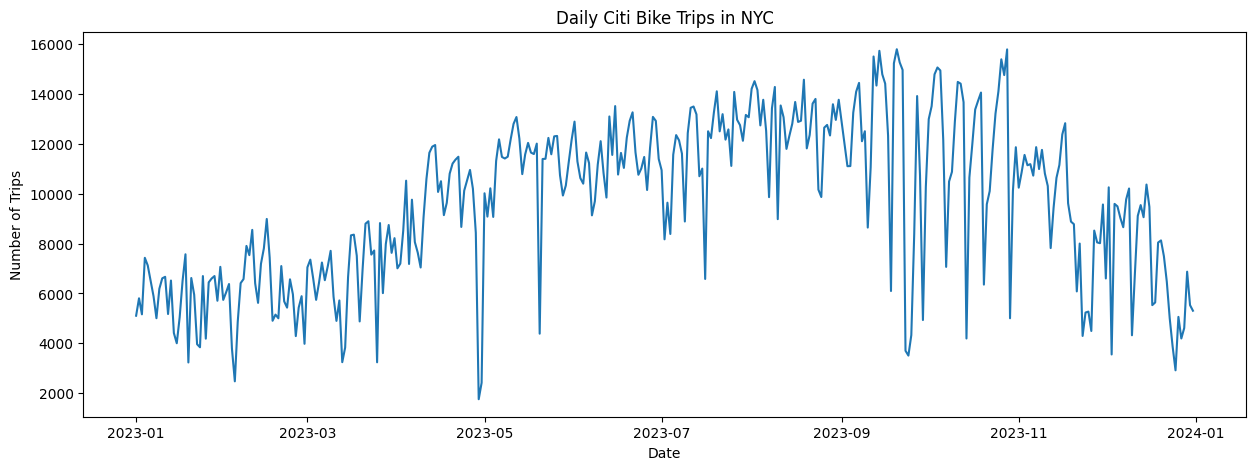

In [62]:
#plot count by day
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.plot(daily_counts['date'], daily_counts['trip_count'])
plt.xlabel('Date')
plt.ylabel('Number of Trips')
plt.title('Daily Citi Bike Trips in NYC')
plt.show()

In [63]:
#count by month
monthly_counts = citi.groupby('month').size().reset_index(name='trip_count')
monthly_counts

,month,trip_count
0,1,179524
1,2,169426
2,3,211633
3,4,275333
4,5,346132
5,6,345117
6,7,366259
7,8,395630
8,9,347350
9,10,373288


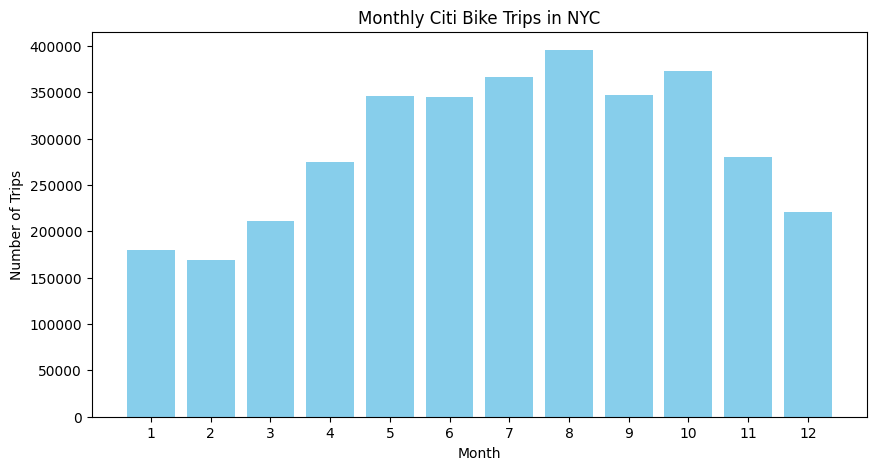

In [64]:
#bar plot by month 
plt.figure(figsize=(10,5))
plt.bar(monthly_counts['month'], monthly_counts['trip_count'], color='skyblue')
plt.xlabel('Month')
plt.ylabel('Number of Trips')
plt.title('Monthly Citi Bike Trips in NYC')
plt.xticks(monthly_counts['month'])
plt.show()

In [65]:
citi['hour'] = pd.to_datetime(citi['started_at']).dt.hour
#to sin cos
citi['hour_sin'] = np.sin(2 * np.pi * citi['hour'] / 24)
citi['hour_cos'] = np.cos(2 * np.pi * citi['hour'] / 24)

In [66]:
citi.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,month,day_of_week,day_of_week_sin,day_of_week_cos,month0,month_sin,month_cos,hour,hour_sin,hour_cos
0,F6024C07C851C801,classic_bike,2023-08-08 17:27:27.205,2023-08-08 17:34:25.606,Central Park North & Adam Clayton Powell Blvd,7617.07,Central Park North & Adam Clayton Powell Blvd,7617.07,40.799484,-73.955613,...,8,1,0.781831,0.623490,7,-0.500000,-8.660254e-01,17,-0.965926,-0.258819
1,4F0026B0A7184066,electric_bike,2023-06-24 15:52:44.703,2023-06-24 16:25:32.520,Harrison Pl & Porter Ave,5090.06,Willoughby St & Fleet St,4628.05,40.706860,-73.928510,...,6,5,-0.974928,-0.222521,5,0.500000,-8.660254e-01,15,-0.707107,-0.707107
2,2EF75E486FC51CBF,electric_bike,2023-04-11 16:06:29.156,2023-04-11 16:14:07.365,E 30 St & Park Ave S,6206.08,8 Ave & W 16 St,6072.11,40.744449,-73.983035,...,4,1,0.781831,0.623490,3,1.000000,6.123234e-17,16,-0.866025,-0.500000
3,2E3086616BBB51AE,classic_bike,2023-04-08 14:39:10.975,2023-04-08 14:44:51.879,Steinway St & 28 Ave,6915.02,35 St & Broadway,6750.16,40.765625,-73.913669,...,4,5,-0.974928,-0.222521,3,1.000000,6.123234e-17,14,-0.500000,-0.866025
4,7BE8FCA8C84DFD32,electric_bike,2023-03-20 16:48:51.140,2023-03-20 16:55:03.825,Great Jones St,5636.11,E 10 St & Avenue A,5659.05,40.727434,-73.993790,...,3,0,0.000000,1.000000,2,0.866025,5.000000e-01,16,-0.866025,-0.500000


In [67]:
citi.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'distance_km', 'date', 'month', 'day_of_week',
       'day_of_week_sin', 'day_of_week_cos', 'month0', 'month_sin',
       'month_cos', 'hour', 'hour_sin', 'hour_cos'],
      dtype='object')

In [68]:
data = citi.copy()

In [69]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse_output=False, drop='first')
station_types_reshaped = data['member_casual'].values.reshape(-1, 1)
station_types_ohe = ohe.fit_transform(station_types_reshaped)
station_types_df = pd.DataFrame(station_types_ohe, columns=ohe.get_feature_names_out(['member_casual']))
data = pd.concat([data, station_types_df], axis=1)

In [70]:
#import one hot encoder


#one hot encoder for rideable_type
rideable_types_reshaped = data['rideable_type'].values.reshape(-1, 1)
rideable_types_ohe = ohe.fit_transform(rideable_types_reshaped)
rideable_types_df = pd.DataFrame(rideable_types_ohe, columns=ohe.get_feature_names_out(['rideable_type']))
data = pd.concat([data, rideable_types_df], axis=1)
data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,day_of_week_cos,month0,month_sin,month_cos,hour,hour_sin,hour_cos,member_casual_member,rideable_type_electric_bike,rideable_type_nan
0,F6024C07C851C801,classic_bike,2023-08-08 17:27:27.205,2023-08-08 17:34:25.606,Central Park North & Adam Clayton Powell Blvd,7617.07,Central Park North & Adam Clayton Powell Blvd,7617.07,40.799484,-73.955613,...,0.623490,7.0,-0.500000,-8.660254e-01,17.0,-0.965926,-0.258819,1.0,0.0,0.0
1,4F0026B0A7184066,electric_bike,2023-06-24 15:52:44.703,2023-06-24 16:25:32.520,Harrison Pl & Porter Ave,5090.06,Willoughby St & Fleet St,4628.05,40.706860,-73.928510,...,-0.222521,5.0,0.500000,-8.660254e-01,15.0,-0.707107,-0.707107,1.0,1.0,0.0
2,2EF75E486FC51CBF,electric_bike,2023-04-11 16:06:29.156,2023-04-11 16:14:07.365,E 30 St & Park Ave S,6206.08,8 Ave & W 16 St,6072.11,40.744449,-73.983035,...,0.623490,3.0,1.000000,6.123234e-17,16.0,-0.866025,-0.500000,1.0,1.0,0.0
3,2E3086616BBB51AE,classic_bike,2023-04-08 14:39:10.975,2023-04-08 14:44:51.879,Steinway St & 28 Ave,6915.02,35 St & Broadway,6750.16,40.765625,-73.913669,...,-0.222521,3.0,1.000000,6.123234e-17,14.0,-0.500000,-0.866025,1.0,0.0,0.0
4,7BE8FCA8C84DFD32,electric_bike,2023-03-20 16:48:51.140,2023-03-20 16:55:03.825,Great Jones St,5636.11,E 10 St & Avenue A,5659.05,40.727434,-73.993790,...,1.000000,2.0,0.866025,5.000000e-01,16.0,-0.866025,-0.500000,1.0,1.0,0.0


In [73]:
data.drop(columns=['rideable_type_nan'])

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,...,day_of_week_sin,day_of_week_cos,month0,month_sin,month_cos,hour,hour_sin,hour_cos,member_casual_member,rideable_type_electric_bike
0,F6024C07C851C801,classic_bike,2023-08-08 17:27:27.205,2023-08-08 17:34:25.606,Central Park North & Adam Clayton Powell Blvd,7617.07,Central Park North & Adam Clayton Powell Blvd,7617.07,40.799484,-73.955613,...,0.781831,0.623490,7.0,-0.500000,-8.660254e-01,17.0,-0.965926,-0.258819,1.0,0.0
1,4F0026B0A7184066,electric_bike,2023-06-24 15:52:44.703,2023-06-24 16:25:32.520,Harrison Pl & Porter Ave,5090.06,Willoughby St & Fleet St,4628.05,40.706860,-73.928510,...,-0.974928,-0.222521,5.0,0.500000,-8.660254e-01,15.0,-0.707107,-0.707107,1.0,1.0
2,2EF75E486FC51CBF,electric_bike,2023-04-11 16:06:29.156,2023-04-11 16:14:07.365,E 30 St & Park Ave S,6206.08,8 Ave & W 16 St,6072.11,40.744449,-73.983035,...,0.781831,0.623490,3.0,1.000000,6.123234e-17,16.0,-0.866025,-0.500000,1.0,1.0
3,2E3086616BBB51AE,classic_bike,2023-04-08 14:39:10.975,2023-04-08 14:44:51.879,Steinway St & 28 Ave,6915.02,35 St & Broadway,6750.16,40.765625,-73.913669,...,-0.974928,-0.222521,3.0,1.000000,6.123234e-17,14.0,-0.500000,-0.866025,1.0,0.0
4,7BE8FCA8C84DFD32,electric_bike,2023-03-20 16:48:51.140,2023-03-20 16:55:03.825,Great Jones St,5636.11,E 10 St & Avenue A,5659.05,40.727434,-73.993790,...,0.000000,1.000000,2.0,0.866025,5.000000e-01,16.0,-0.866025,-0.500000,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2709420,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0
2891338,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0
2980388,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0
3215434,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0


In [79]:
data = data.dropna(subset=['ride_id'])
data = data.dropna(subset=['member_casual_member'])

In [80]:
data.isna().sum()

ride_id                            0
rideable_type                      0
started_at                         0
ended_at                           0
start_station_name              1819
start_station_id                1819
end_station_name               10085
end_station_id                 10085
start_lat                       1819
start_lng                       1819
end_lat                        10021
end_lng                        10021
member_casual                      0
distance_km                    10545
date                               0
month                              0
day_of_week                        0
day_of_week_sin                    0
day_of_week_cos                    0
month0                             0
month_sin                          0
month_cos                          0
hour                               0
hour_sin                           0
hour_cos                           0
member_casual_member               0
rideable_type_electric_bike        0
r

In [134]:
daily = data.groupby(['date']).agg({
    'ride_id': 'count',
    'distance_km': 'mean',
    'month_sin': 'first',
    'month_cos': 'first',
    'day_of_week_sin': 'first',
    'day_of_week_cos': 'first',
    'member_casual_member': 'sum',
    'rideable_type_electric_bike': 'sum'})
    

In [135]:
daily.rename(columns={'ride_id': 'total_rides','distance_km':'avg_distance_km', 'member_casual_member': 'total_members', 'rideable_type_electric_bike': 'total_electric_bikes'}, inplace=True)

In [136]:
daily.reset_index(inplace=True)

In [137]:
daily

,date,total_rides,avg_distance_km,month_sin,month_cos,day_of_week_sin,day_of_week_cos,total_members,total_electric_bikes
0,2023-01-01,5109,1.972479,0.0,1.000000,-0.781831,0.623490,4132.0,2617.0
1,2023-01-02,5808,1.826934,0.0,1.000000,0.000000,1.000000,4707.0,2905.0
2,2023-01-03,5165,1.811452,0.0,1.000000,0.781831,0.623490,4174.0,2544.0
3,2023-01-04,7430,1.857146,0.0,1.000000,0.974928,-0.222521,6011.0,3681.0
4,2023-01-05,7125,1.796363,0.0,1.000000,0.433884,-0.900969,5809.0,3533.0
...,...,...,...,...,...,...,...,...,...
360,2023-12-27,4196,1.748691,-0.5,0.866025,0.974928,-0.222521,3374.0,2128.0
361,2023-12-28,4616,1.823671,-0.5,0.866025,0.433884,-0.900969,3721.0,2330.0
362,2023-12-29,6874,1.891382,-0.5,0.866025,-0.433884,-0.900969,5551.0,3464.0
363,2023-12-30,5533,1.870094,-0.5,0.866025,-0.974928,-0.222521,4536.0,2743.0


In [124]:
wdf.rename(columns={'DATE': 'date'}, inplace=True)

/var/folders/m6/lt2vtzlx7q16z7m2rk2sjjs40000gn/T/ipykernel_97655/1212773279.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wdf.rename(columns={'DATE': 'date'}, inplace=True)


In [125]:
wdf

,date,wind_avg,percip_total,temp_min,temp_max
0,2023-01-01,4.92,0.00,49,55
1,2023-01-02,3.58,0.02,49,56
2,2023-01-03,3.13,0.42,47,58
3,2023-01-04,4.47,0.02,49,66
4,2023-01-05,5.14,0.01,44,50
...,...,...,...,...,...
360,2023-12-27,5.14,0.32,45,50
361,2023-12-28,6.93,1.22,49,55
362,2023-12-29,3.36,0.05,46,55
363,2023-12-30,6.49,0.00,39,46


In [126]:
wdf['date'] = pd.to_datetime(wdf['date'], errors='coerce')

/var/folders/m6/lt2vtzlx7q16z7m2rk2sjjs40000gn/T/ipykernel_97655/1356175063.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wdf['date'] = pd.to_datetime(wdf['date'], errors='coerce')


In [127]:
wdf

,date,wind_avg,percip_total,temp_min,temp_max
0,2023-01-01,4.92,0.00,49,55
1,2023-01-02,3.58,0.02,49,56
2,2023-01-03,3.13,0.42,47,58
3,2023-01-04,4.47,0.02,49,66
4,2023-01-05,5.14,0.01,44,50
...,...,...,...,...,...
360,2023-12-27,5.14,0.32,45,50
361,2023-12-28,6.93,1.22,49,55
362,2023-12-29,3.36,0.05,46,55
363,2023-12-30,6.49,0.00,39,46


In [138]:
daily = daily.merge(wdf, on='date', how='left')

In [139]:
daily.head()

,date,total_rides,avg_distance_km,month_sin,month_cos,day_of_week_sin,day_of_week_cos,total_members,total_electric_bikes,wind_avg,percip_total,temp_min,temp_max
0,2023-01-01,5109,1.972479,0.0,1.0,-0.781831,0.623490,4132.0,2617.0,4.92,0.00,49,55
1,2023-01-02,5808,1.826934,0.0,1.0,0.000000,1.000000,4707.0,2905.0,3.58,0.02,49,56
2,2023-01-03,5165,1.811452,0.0,1.0,0.781831,0.623490,4174.0,2544.0,3.13,0.42,47,58
3,2023-01-04,7430,1.857146,0.0,1.0,0.974928,-0.222521,6011.0,3681.0,4.47,0.02,49,66
4,2023-01-05,7125,1.796363,0.0,1.0,0.433884,-0.900969,5809.0,3533.0,5.14,0.01,44,50


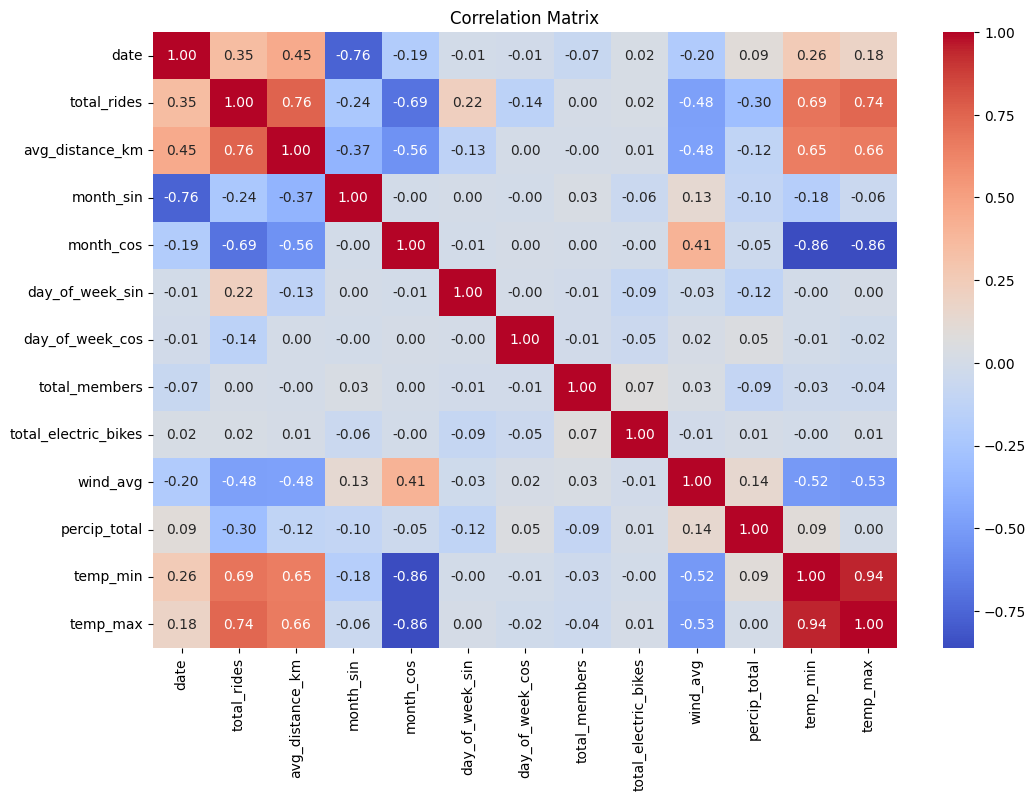

In [149]:
#correlations
correlation_matrix = daily.corr()
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [142]:
daily['total_electric_bikes'] = daily['total_electric_bikes']/daily['total_rides']
daily['total_members'] = daily['total_members']/daily['total_rides']

In [150]:
#predicting total_rides using weather and other features
# --- IGNORE ---
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
# --- IGNORE ---
features = ['month_sin', 'month_cos', 'day_of_week_sin', 'day_of_week_cos', 'wind_avg', 'percip_total', 'temp_max']
target = 'total_rides'
X = daily[features]
y = daily[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# --- IGNORE ---
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
# --- IGNORE ---
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 2108570.993328767
R^2 Score: 0.8169086849897192


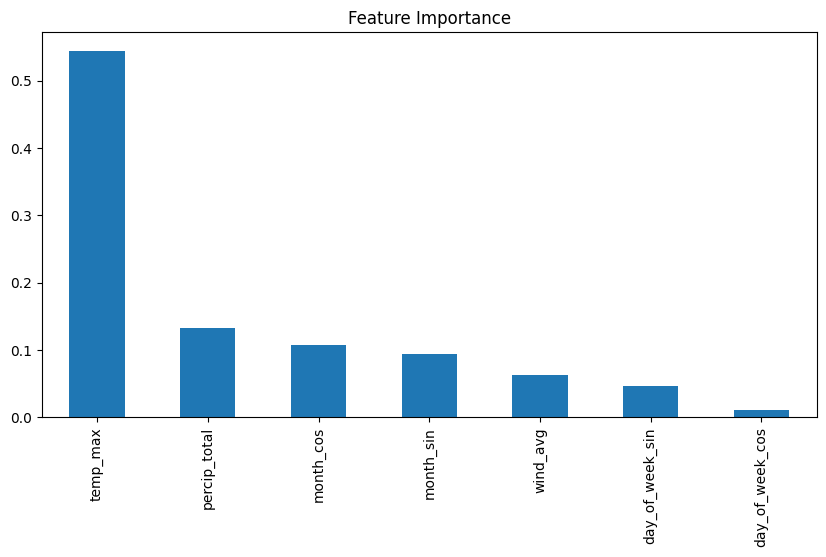

In [151]:
#coefs
importances = model.feature_importances_
feature_importance = pd.Series(importances, index=features).sort_values(ascending=False)
feature_importance.plot(kind='bar', figsize=(10,5))
plt.title('Feature Importance')
plt.show()

In [ ]:
#TODO
#przewidywanie na podstawie lokalizacji?

In [195]:
places_list = [
    # Landmarkes
    ("Times Square", 40.7580, -73.9855, "landmark"),
    ("Central Park (center)", 40.7829, -73.9654, "landmark"),
    ("Empire State Building", 40.7484, -73.9857, "landmark"),
    ("Grand Central Terminal", 40.7527, -73.9772, "landmark"),
    ("One World Trade Center", 40.7127, -74.0134, "landmark"),
    ("High Line (south)", 40.7424, -74.0060, "landmark"),
    ("Brooklyn Bridge", 40.7061, -73.9969, "landmark"),
    ("Columbus Circle", 40.7681, -73.9819, "landmark"),
    ("Yankee Stadium", 40.8296, -73.9262, "landmark"),
    ("Statue of Liberty", 40.6892, -74.0445, "landmark"),
    # Clusters
    ("Midtown Manhattan", 40.7549, -73.9840, "business_cluster"),
    ("Downtown Financial District", 40.7060, -74.0090, "business_cluster"),
    ("Midtown South / Flatiron", 40.7440, -73.9903, "business_cluster"),
    ("Hudson Yards", 40.7553, -74.0010, "business_cluster"),
    ("Lower East Midtown", 40.7510, -73.9730, "business_cluster"),
    ("Long Island City", 40.7440, -73.9480, "business_cluster"),
    ("Downtown Brooklyn", 40.6928, -73.9853, "business_cluster"),
]

places = pd.DataFrame(places_list, columns=["name", "lat", "lon", "type"])
places

,name,lat,lon,type
0,Times Square,40.7580,-73.9855,landmark
1,Central Park (center),40.7829,-73.9654,landmark
2,Empire State Building,40.7484,-73.9857,landmark
3,Grand Central Terminal,40.7527,-73.9772,landmark
4,One World Trade Center,40.7127,-74.0134,landmark
5,High Line (south),40.7424,-74.0060,landmark
6,Brooklyn Bridge,40.7061,-73.9969,landmark
7,Columbus Circle,40.7681,-73.9819,landmark
8,Yankee Stadium,40.8296,-73.9262,landmark
9,Statue of Liberty,40.6892,-74.0445,landmark
